# Salary Prediction Model

## Data Collection 

In [1]:
import pandas as pd #importing pandas module as pd 
employee=pd.read_csv("C:/Users/HP/Downloads/ML case Study.csv",header=0) #loading data into variables
college=pd.read_csv("C:/Users/HP/Downloads/Colleges.csv",header=0)
city=pd.read_csv("C:/Users/HP/Downloads/cities.csv",header=0)

In [2]:
employee.head() #displaying data of employee

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [3]:
college.head() #displaying data of college

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [4]:
city.head() #displaying data of city

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## Data pre-processing

### *Handling missing values*

In [5]:
employee.info() #on observing we can observe there is no missing values in given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


###  *Handling categorical variables*

In [6]:
#colleges of respective tier will be returned as lists
tier1=college['Tier 1'].tolist()
tier2=college['Tier 2'].tolist()
tier3=college['Tier 3'].tolist()
Tier1,Tier2,Tier3=[],[],[]
for item in tier1: #tier1 has some nan values.so,we need to find only non-nan values 
    if str(item)!='nan':
        Tier1.append(item) #on checking the condition item not equal to 'nan', college is appended to Tier1 list
Tier2=tier2#there are no nan values in tier2.so,directly assigning
for item in tier3: #tier3 has some nan values.so,we need to find only non-nan values
    if str(item)!='nan':
        Tier3.append(item) #on checking the condition item not equal to 'nan', college is appended to Tier3 list
for item in employee.College:
    if item in Tier1:
        employee['College'].replace(item,1,inplace=True) #replacing college name with 1 inplace i.e in dataframe
    elif item in Tier2:
        employee['College'].replace(item,2,inplace=True) #replacing college name with 2 inplace i.e in dataframe
    elif item in Tier3:
        employee['College'].replace(item,3,inplace=True) #replacing college name with 3 inplace i.e in dataframe

In [7]:
#cities under metro and non-metro categories are returned as lists
metro=city['Metrio City'].tolist() #here there are no nan values in metro list.so, no need to check
nm=city['non-metro cities'].tolist()
non_metro=[]
for item in nm: #nm has some nan values.so,we need to find only non-nan values 
    if str(item)!='nan':
        non_metro.append(item) #on checking the condition item not equal to 'nan', city is appended to non_metro list
for item in employee.City:
    if item in non_metro:
        employee['City'].replace(item,0,inplace=True) #replacing non_metro cityname with 0 inplace i.e in dataframe
    elif item in metro:
        employee['City'].replace(item,1,inplace=True) #replacing metro cityname with 1 inplace i.e in dataframe

In [8]:
employee=pd.get_dummies(employee) #creating dummies for categorical valued columns
employee=employee.drop('Role_Executive',axis=1) #droping role_executive column as there exists role_manager column 

### *Handling outliers*

In [9]:
employee.describe() #it displays stats of each column for outlier detection

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


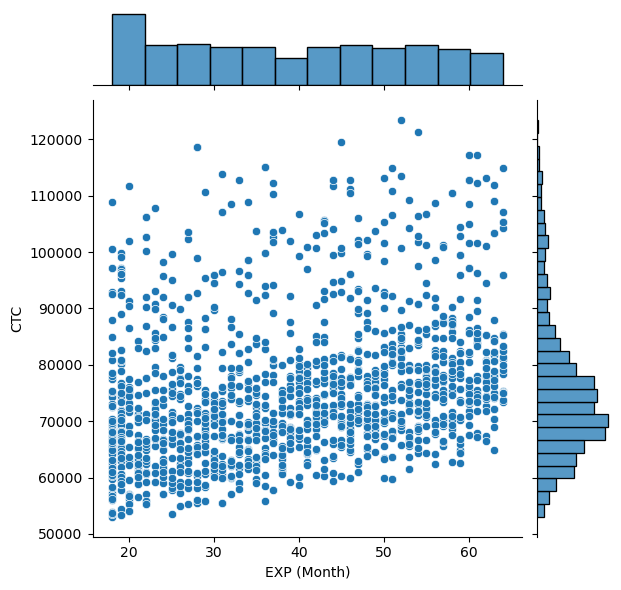

In [10]:
import seaborn as sns
sns.jointplot(x='EXP (Month)',y='CTC',data=employee) #plotting scatter plot for outlier detection

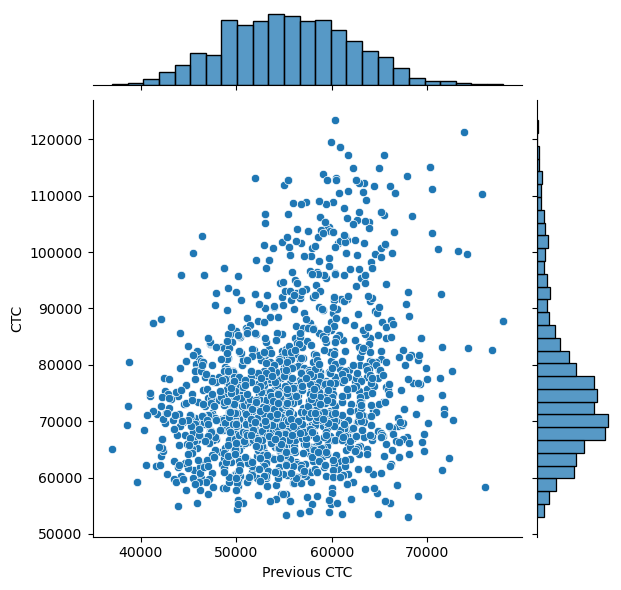

In [11]:
sns.jointplot(x='Previous CTC',y='CTC',data=employee) #plotting scatter plot for outlier detection

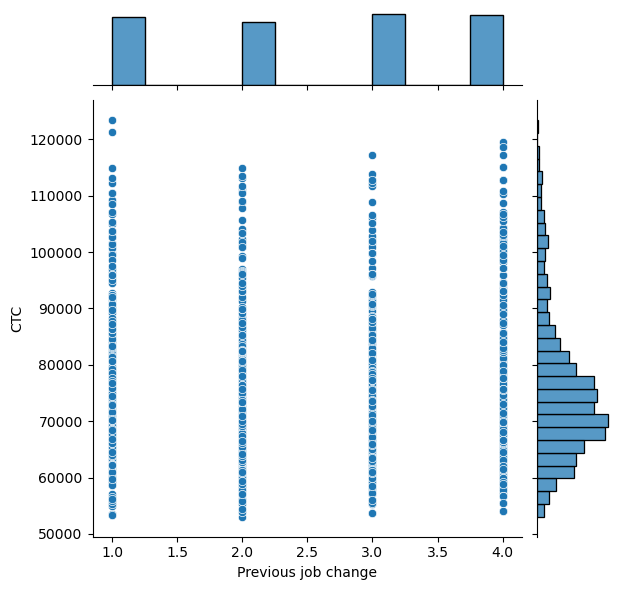

In [12]:
sns.jointplot(x='Previous job change',y='CTC',data=employee) #plotting scatter plot for outlier detection

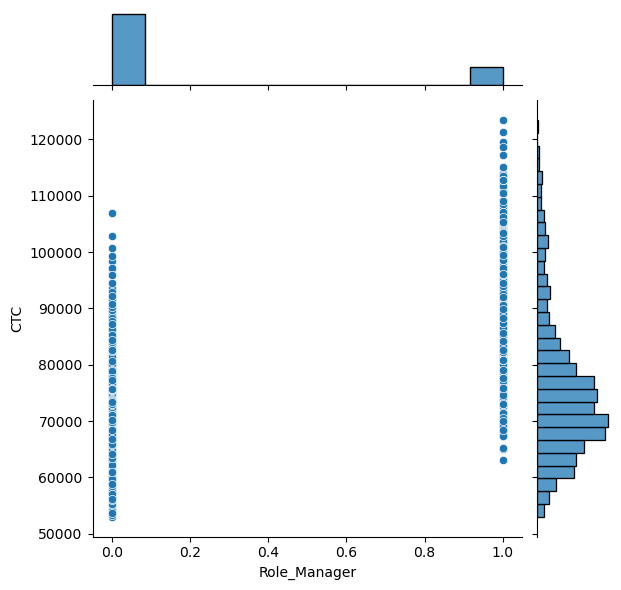

In [13]:
sns.jointplot(x='Role_Manager',y='CTC',data=employee) #plotting scatter plot for outlier detection

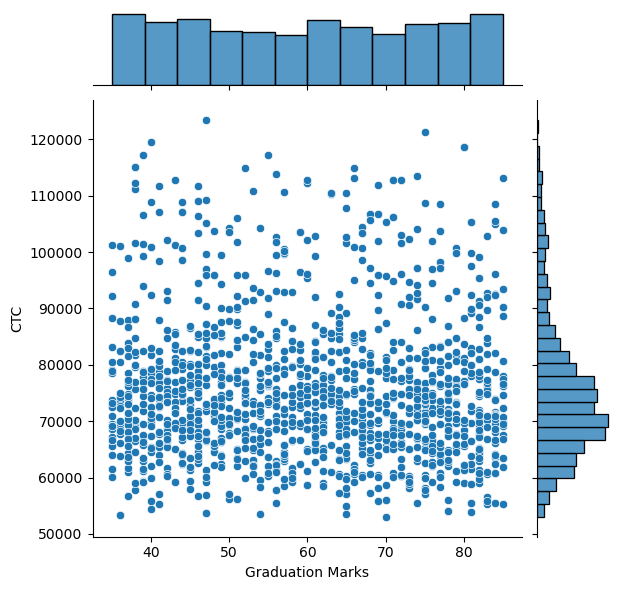

In [14]:
sns.jointplot(x='Graduation Marks',y='CTC',data=employee) #plotting scatter plot for outlier detection

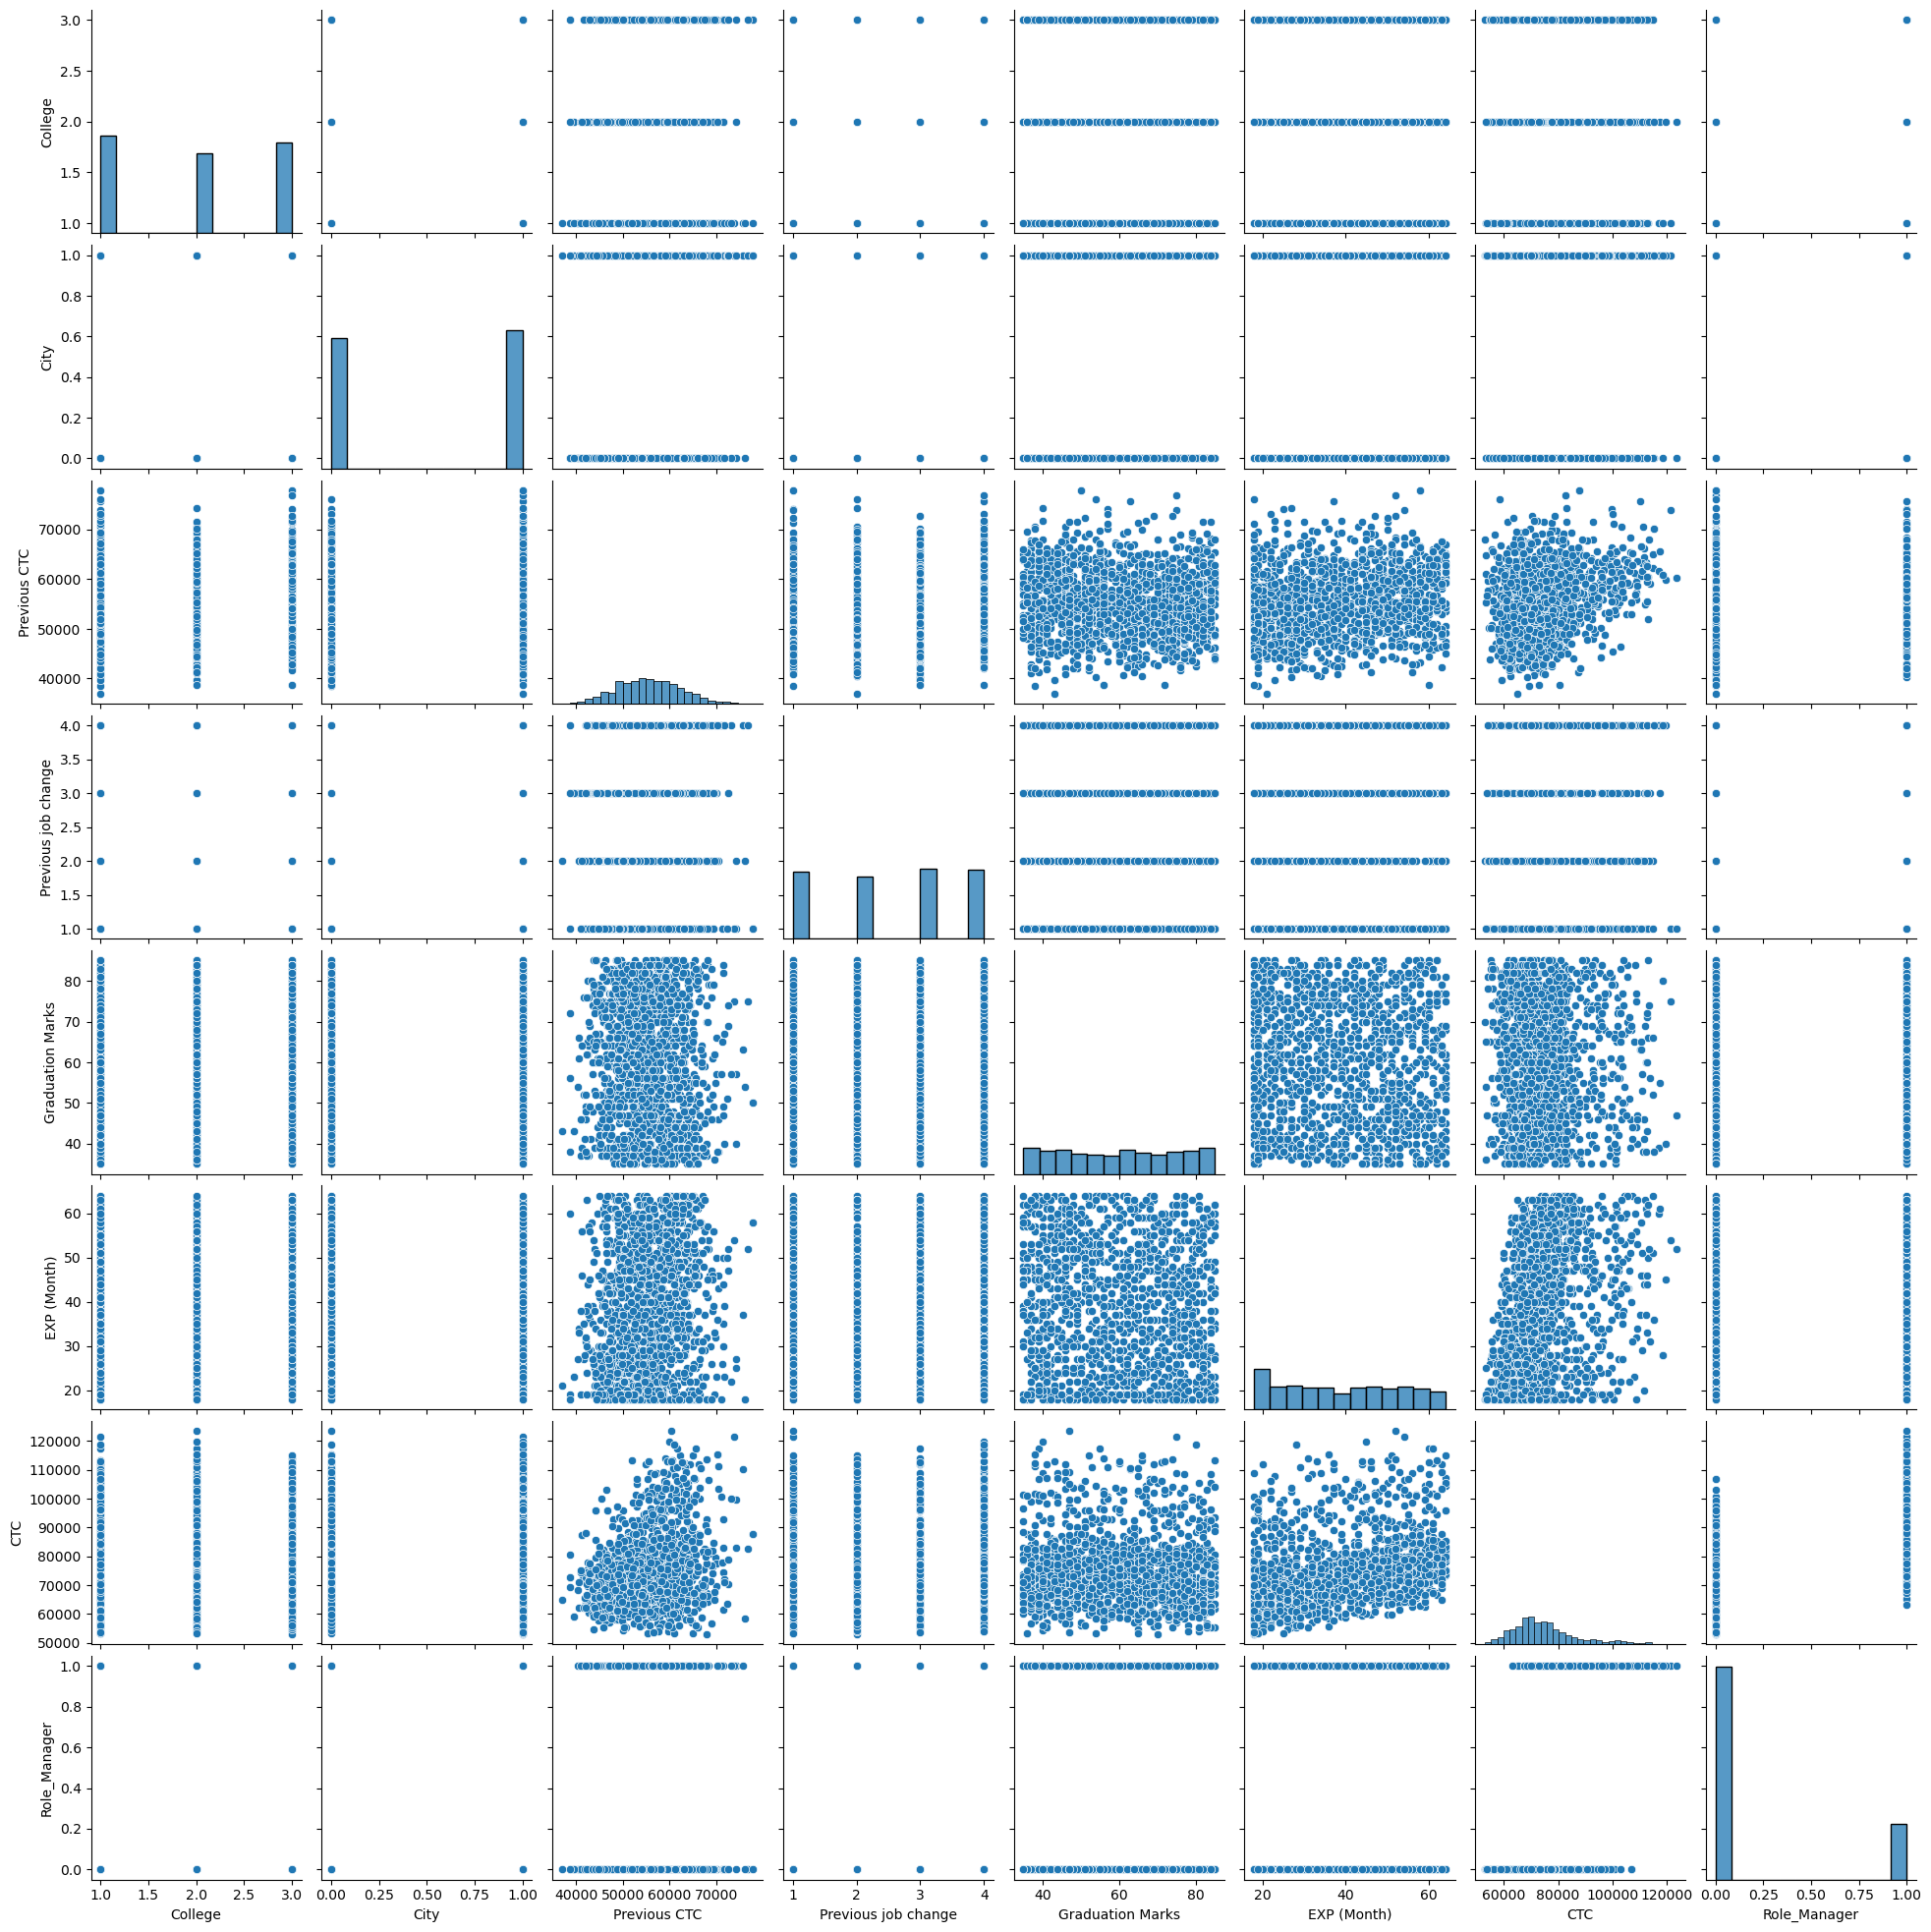

In [15]:
sns.pairplot(employee) #plotting scatter plot for outlier detection for every pair of variables in the dataframe

### *finding which features affects the CTC*

In [16]:
employee.corr() #it displays the table of corelation coefficients of the dependent & independent variables

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


# Simple Linear Regression

In [17]:
import statsmodels.api as sn
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
x=sn.add_constant(employee['Role_Manager']) #adding constant to x variable
y=employee['CTC']
lm=sn.OLS(y,x).fit() #fitting the data to the model
lm.summary() #displaying metrics of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     997.8
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.54e-170
Time:                        13:33:45   Log-Likelihood:                -16867.
No. Observations:                1589   AIC:                         3.374e+04
Df Residuals:                    1587   BIC:                         3.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.137e+04    277.834    256.865      0.000    7.08e+04    7.19e+04
Role_Manager  1.932e+04    611.520     31.588      0.000    1.81e+04    2.05e+04
==============================================================================
Omnibus:                       30.737   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.082
Skew:                           0.334   Prob(JB):                     1.08e-07
Kurtosis:                       3.193   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x=sn.add_constant(employee['EXP (Month)']) #adding constant to x variable
y=employee['CTC']
lm=sn.OLS(y,x).fit() #fitting the data to the model
lm.summary() #displaying metrics of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.16e-34
Time:                        13:33:45   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x=sn.add_constant(employee['Previous CTC']) #adding constant to x variable
y=employee['CTC']
lm=sn.OLS(y,x).fit() #fitting the data to the model
lm.summary() #displaying metrics of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.41e-25
Time:                        13:33:45   Log-Likelihood:                -17200.
No. Observations:                1589   AIC:                         3.440e+04
Df Residuals:                    1587   BIC:                         3.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.826e+04   2564.822     18.817      0.000    4.32e+04    5.33e+04
Previous CTC     0.4880      0.046     10.638      0.000       0.398       0.578
==============================================================================
Omnibus:                      173.415   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.003
Skew:                           0.864   Prob(JB):                     9.33e-52
Kurtosis:                       3.752   Cond. No.                     4.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x=sn.add_constant(employee['Previous job change']) #adding constant to x variable
y=employee['CTC']
lm=sn.OLS(y,x).fit() #fitting the data to the model
lm.summary() #displaying metrics of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2052
Date:                Sat, 14 Oct 2023   Prob (F-statistic):              0.651
Time:                        13:33:45   Log-Likelihood:                -17255.
No. Observations:                1589   AIC:                         3.451e+04
Df Residuals:                    1587   BIC:                         3.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.503e+04    777.845     96.460      0.000    7.35e+04    7.66e+04
Previous job change   127.3412    281.113      0.453      0.651    -424.051     678.733
==============================================================================
Omnibus:                      253.283   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.671
Skew:                           1.091   Prob(JB):                     1.99e-86
Kurtosis:                       4.094   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *Importing  Neccesary libraries for model buliding*

In [21]:
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

## Feature Engineering and Data Splitting

#### *I created 3 different datasets which varies in feature selection and*
#### *these features are selected based on correlation analysis and their p values which affects target variable and EDA*

###  *1st dataset and splitting&standardisation of data*

In [22]:
x_1=employee.loc[:,employee.columns!='CTC']
y_1=employee['CTC']
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.2,random_state=0) #splitting data into training&testing data
scaler_1=StandardScaler().fit(x_train_1) #fitting data to StandardScaler object for standardisation
x_train_s_1=scaler_1.transform(x_train_1) #transforming x training data
x_test_s_1=scaler_1.transform(x_test_1) #transforming x testing data
d1={'Model':[],'r2_score':[],'MAE':[],'RMSE':[]} #dictionary for storing evaluation metrics of the 1st model

###  *2nd dataset and splitting&standardisation of data*

In [23]:
x_2=employee.loc[:,['Previous job change','Previous CTC','EXP (Month)','Role_Manager']]
y_2=employee['CTC']
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_2,y_2,test_size=0.2,random_state=0) #splitting data into training&testing data
scaler_2=StandardScaler().fit(x_train_2) #fitting data to StandardScaler object for standardisation
x_train_s_2=scaler_2.transform(x_train_2) #transforming x training data
x_test_s_2=scaler_2.transform(x_test_2) #transforming x testing data
d2={'Model':[],'r2_score':[],'MAE':[],'RMSE':[]} #dictionary for storing evaluation metrics of the 2nd model

###  *3rd dataset and splitting&standardisation of data*

In [24]:
x_3=employee.loc[:,['Previous CTC','EXP (Month)','Role_Manager']]
y_3=employee['CTC']
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(x_3,y_3,test_size=0.2,random_state=0) #splitting data into training&testing data
scaler_3=StandardScaler().fit(x_train_3) #fitting data to StandardScaler object for standardisation
x_train_s_3=scaler_3.transform(x_train_3) #transforming x training data
x_test_s_3=scaler_3.transform(x_test_3) #transforming x testing data
d3={'Model':[],'r2_score':[],'MAE':[],'RMSE':[]} #dictionary for storing evaluation metrics of the 3rd model

# Multiple Linear Regression

### *1st Model of Multiple Linear Regression using 1st dataset*

In [25]:
lm_1=LinearRegression() #creating linear regression model
lm_1.fit(x_train_s_1,y_train_1) #fitting the model with data
y_train_p=lm_1.predict(x_train_s_1) #predicting y training data using x training data
y_test_p = lm_1.predict(x_test_s_1) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
print('     ')
print('Constant:',lm_1.intercept_) #finding constant β0
print(x_train_1.columns)
print('Coefficients:',lm_1.coef_) #finding β1,β2,.....,βn
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Multiple Linear Regression') #appending model name to d1

Metrics of the model for training data
r2_score: 0.5331293335456955 , MAE: 6858.143106733391, RMSE: 8665.235122983437
     
Metrics of the model for testing data
r2_score: 0.535598989479013 , MAE: 6592.541375055973, RMSE: 8301.19694378618
     
Constant: 75332.82624704957
Index(['College', 'City', 'Previous CTC', 'Previous job change',
       'Graduation Marks', 'EXP (Month)', 'Role_Manager'],
      dtype='object')
Coefficients: [-332.94075503  466.09518958 2872.75063106  109.94338916  148.23952743
 3642.74246351 7805.56161271]


### *2nd Model of Multiple Linear Regression using 2nd dataset*

In [26]:
lm_2=LinearRegression() #creating linear regression model
lm_2.fit(x_train_s_2,y_train_2) #fitting the model with data
y_train_p=lm_2.predict(x_train_s_2) #predicting y training data using x training data
y_test_p = lm_2.predict(x_test_s_2) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
print('     ')
print('Constant:',lm_2.intercept_) #finding constant β0
print(x_train_2.columns)
print('Coefficients:',lm_2.coef_)  #finding β1,β2,.....,βn
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Multiple Linear Regression') #appending model name to d2

Metrics of the model for training data
r2_score: 0.5309314014735758 , MAE: 6857.925331853625, RMSE: 8685.608254629644
     
Metrics of the model for testing data
r2_score: 0.5408657517802105 , MAE: 6546.157602537942, RMSE: 8253.990869533734
     
Constant: 75332.82624704957
Index(['Previous job change', 'Previous CTC', 'EXP (Month)', 'Role_Manager'], dtype='object')
Coefficients: [ 148.49070915 2870.54766396 3614.64768069 7800.48916163]


### *3rd Model of Multiple Linear Regression using 3rd dataset*

In [27]:
lm_3=LinearRegression() #creating linear regression model
lm_3.fit(x_train_s_3,y_train_3) #fitting the model with data
y_train_p=lm_3.predict(x_train_s_3) #predicting y training data using x training data
y_test_p = lm_3.predict(x_test_s_3) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
print('     ')
print('Constant:',lm_3.intercept_) #finding constant β0
print(x_train_3.columns)
print('Coefficients:',lm_3.coef_)  #finding β1,β2,.....,βn
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Multiple Linear Regression') #appending model name to d3

Metrics of the model for training data
r2_score: 0.5307944959390206 , MAE: 6857.581730026519, RMSE: 8686.875682349348
     
Metrics of the model for testing data
r2_score: 0.5404333527798868 , MAE: 6551.819750949487, RMSE: 8257.87663661744
     
Constant: 75332.82624704957
Index(['Previous CTC', 'EXP (Month)', 'Role_Manager'], dtype='object')
Coefficients: [2871.74453757 3619.24050468 7797.89800345]


# Ridge Regression

### *1st Model of Ridge Regression using 1st dataset*

Metrics of the model for training data
r2_score: 0.5331238227310131 , MAE: 6859.473970681583, RMSE: 8665.286263874757
     
Metrics of the model for testing data
r2_score: 0.535475412672408 , MAE: 6593.911768295884, RMSE: 8302.301341872768

Validation Curve


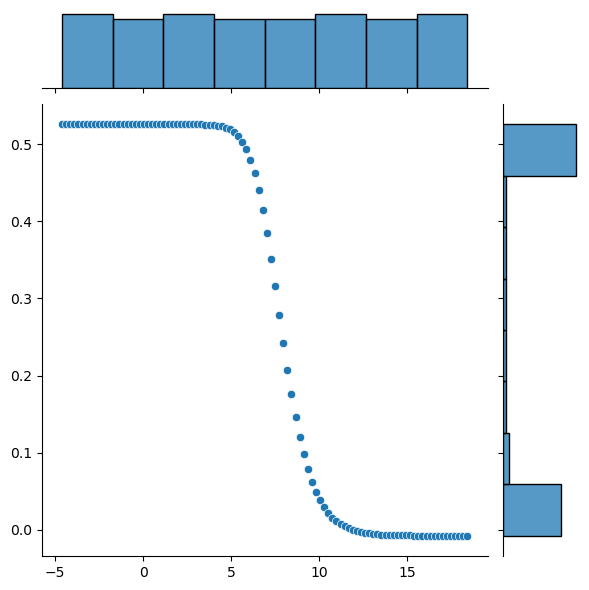

In [28]:
param_range=np.logspace(-2,8,100) #defining param range
train_scores,test_scores=validation_curve(Ridge(),x_train_s_1,y_train_1,param_name='alpha',param_range=param_range,scoring='r2') #finding train&test scores using validation curve
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Ridge(alpha=param_range[alpha[0][0]]) #Creating Ridge model
lm_r_best.fit(x_train_s_1,y_train_1) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_1) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_1) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
print('')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Ridge Regression') #appending model name to d1

### *2nd Model of Ridge Regression using 2nd dataset*

Metrics of the model for training data
r2_score: 0.5309308677432357 , MAE: 6858.305224923637, RMSE: 8685.613196093795
     
Metrics of the model for testing data
r2_score: 0.5408190944511828 , MAE: 6546.520890336169, RMSE: 8254.410245115127
Validation Curve


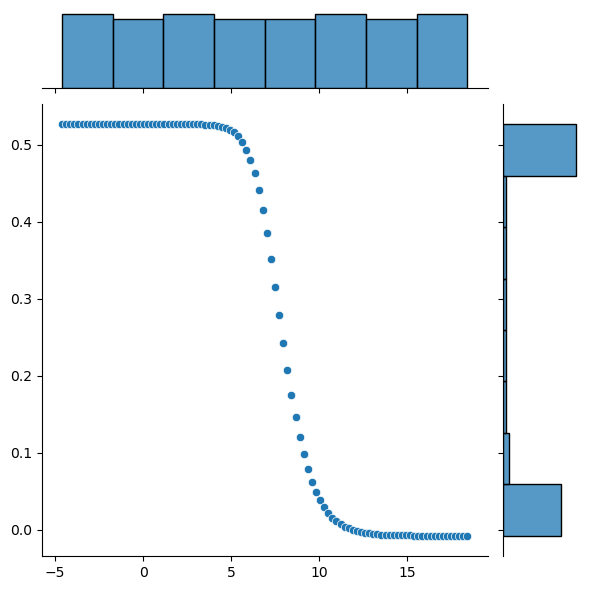

In [29]:
param_range=np.logspace(-2,8,100)  #defining param range
train_scores,test_scores=validation_curve(Ridge(),x_train_s_2,y_train_2,param_name='alpha',param_range=param_range,scoring='r2') #finding train&test scores using validation curve
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Ridge(alpha=param_range[alpha[0][0]]) #Creating Ridge model
lm_r_best.fit(x_train_s_2,y_train_2) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_2) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_2) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Ridge Regression') #appending model name to d2

### *3rd Model of Ridge Regression using 3rd dataset*

Metrics of the model for training data
r2_score: 0.5307941607111775 , MAE: 6857.877672148278, RMSE: 8686.878785554718
     
Metrics of the model for testing data
r2_score: 0.5403969764971244 , MAE: 6552.057878926831, RMSE: 8258.203449837416
Validation Curve


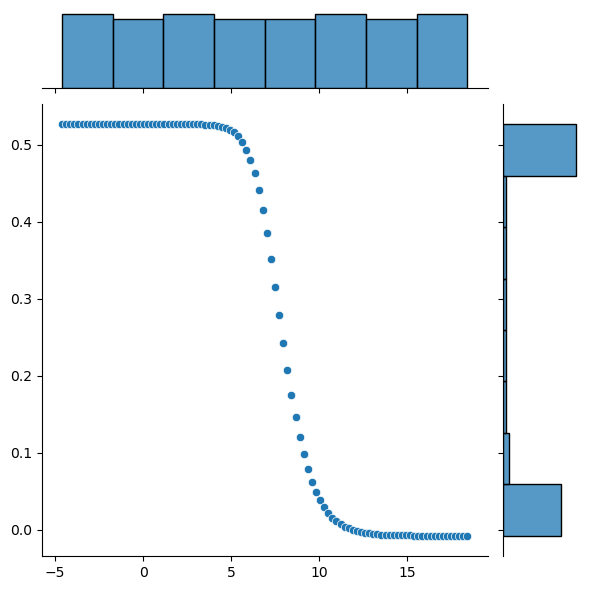

In [30]:
param_range=np.logspace(-2,8,100)  #defining param range
train_scores,test_scores=validation_curve(Ridge(),x_train_s_3,y_train_3,param_name='alpha',param_range=param_range,scoring='r2')
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Ridge(alpha=param_range[alpha[0][0]]) #Creating Ridge model
lm_r_best.fit(x_train_s_3,y_train_3) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_3) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_3) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Ridge Regression') #appending model name to d3

# Lasso Regression

### *1st Model of Lasso Regression using 1st dataset*

Metrics of the model for training data
r2_score: 0.5330506384208464 , MAE: 6859.594341775347, RMSE: 8665.965392708782
     
Metrics of the model for testing data
r2_score: 0.5360908337999819 , MAE: 6590.213196721246, RMSE: 8296.799905346152

Validation Curve


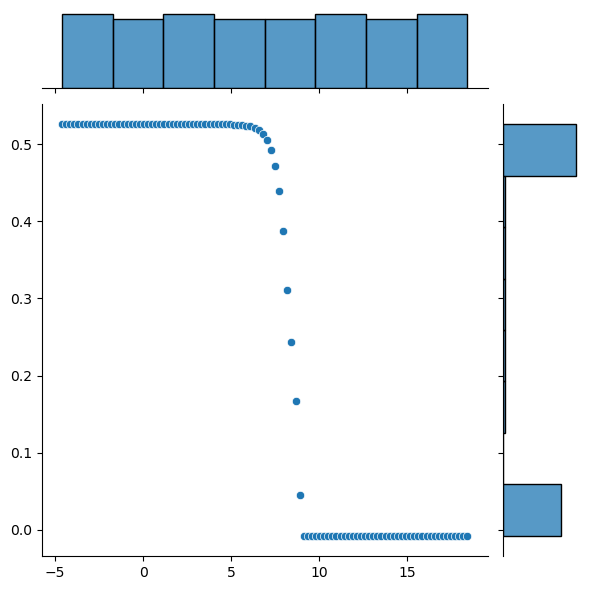

In [31]:
param_range=np.logspace(-2,8,100) #defining param range
train_scores,test_scores=validation_curve(Lasso(),x_train_s_1,y_train_1,param_name='alpha',param_range=param_range,scoring='r2') #finding train&test scores using validation curve
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Lasso(alpha=param_range[alpha[0][0]]) #Creating Lasso model
lm_r_best.fit(x_train_s_1,y_train_1) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_1) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_1) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
print('')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Lasso Regression') #appending model name to d1

### *2nd Model of Lasso Regression using 2nd dataset*

Metrics of the model for training data
r2_score: 0.5309311438989386 , MAE: 6858.087527754143, RMSE: 8685.610639347033
     
Metrics of the model for testing data
r2_score: 0.5408521172985176 , MAE: 6546.288589125535, RMSE: 8254.113424159492
Validation Curve


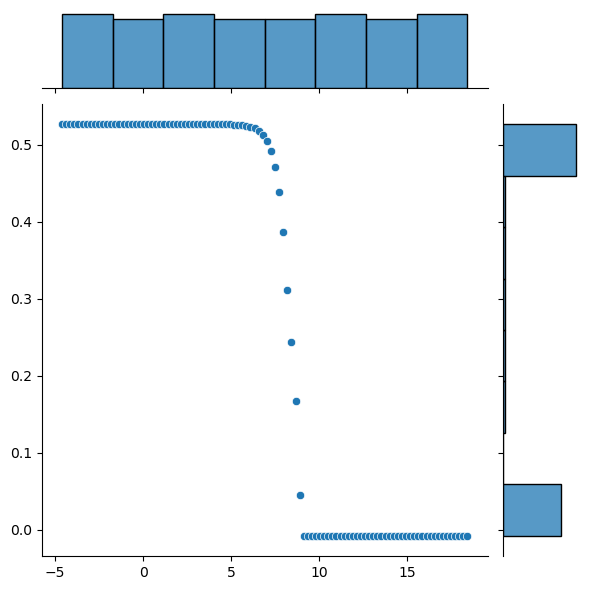

In [32]:
param_range=np.logspace(-2,8,100)  #defining param range
train_scores,test_scores=validation_curve(Lasso(),x_train_s_2,y_train_2,param_name='alpha',param_range=param_range,scoring='r2') #finding train&test scores using validation curve
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Lasso(alpha=param_range[alpha[0][0]]) #Creating Lasso model
lm_r_best.fit(x_train_s_2,y_train_2) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_2) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_2) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Lasso Regression') #appending model name to d2

### *3rd Model of Lasso Regression using 3rd dataset*

Metrics of the model for training data
r2_score: 0.5307944959373756 , MAE: 6857.582245720694, RMSE: 8686.875682364576
     
Metrics of the model for testing data
r2_score: 0.5404333272620254 , MAE: 6551.819842376928, RMSE: 8257.87686588054
Validation Curve


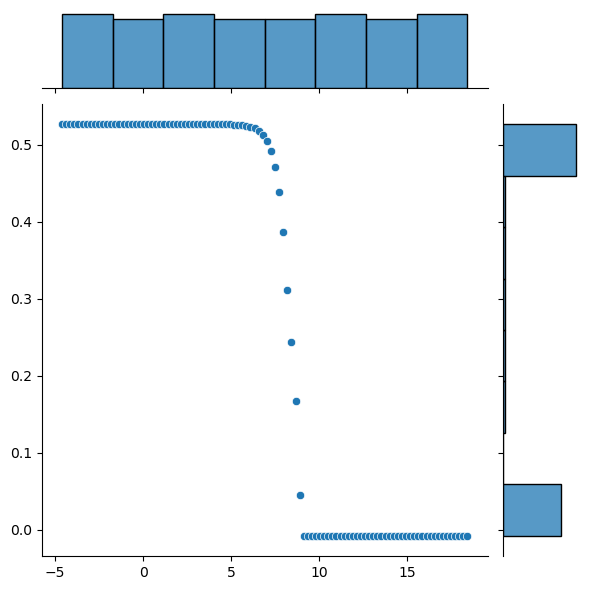

In [33]:
param_range=np.logspace(-2,8,100)  #defining param range
train_scores,test_scores=validation_curve(Lasso(),x_train_s_3,y_train_3,param_name='alpha',param_range=param_range,scoring='r2')
test_mean,train_mean=np.mean(test_scores,axis=1),np.mean(train_scores,axis=1) #finding mean's of test scores and train scores
alpha=np.where(test_mean==max(test_mean)) #2D-array containing index of maximum test mean
lm_r_best=Lasso(alpha=param_range[alpha[0][0]]) #Creating Lasso model
lm_r_best.fit(x_train_s_3,y_train_3) #fitting the training data for the ridge model 
y_train_p=lm_r_best.predict(x_train_s_3) #predicting y using x training data 
y_test_p = lm_r_best.predict(x_test_s_3) #predicting y using x testing data 
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
print('Validation Curve')
sns.jointplot(x=np.log(param_range),y=test_mean) #plotting Validation curve
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Lasso Regression') #appending model name to d3

# Regression using KNN

### *1st model of KNN using 1st dataset*

In [34]:
p={'n_neighbors':[35,36,37,38,39,40,41,42,43,44,45]} #defining n_neighbors range
gsv=GridSearchCV(KNeighborsRegressor(),p) #intializing GridSearchCV object for regression
gsv.fit(x_train_s_1,y_train_1) #fitting GridSearchCV object with data
print(gsv.best_params_) #displaying best and optimal n_neighbor value in the given range
lm_1=gsv.best_estimator_ #choosing best regression model with best n_neighbor value in the range
y_train_p=lm_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = lm_1.predict(x_test_s_1) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('KNN') #appending model name to d1

{'n_neighbors': 36}
Metrics of the model for training data
r2_score: 0.5803314184975825 , MAE: 6522.926226505813, RMSE: 8215.524324764552
     
Metrics of the model for testing data
r2_score: 0.577109337780324 , MAE: 6151.661945317959, RMSE: 7921.513876204795


### *2nd model of KNN using 2nd dataset*

In [35]:
p={'n_neighbors':[35,36,37,38,39,40,41,42,43,44,45]} #defining n_neighbors range
gsv=GridSearchCV(KNeighborsRegressor(),p) #intializing GridSearchCV object for regression
gsv.fit(x_train_s_2,y_train_2) #fitting GridSearchCV object with data
print(gsv.best_params_) #displaying best and optimal n_neighbor value in the given range
lm_2=gsv.best_estimator_ #choosing best regression model with best n_neighbor value in the range
y_train_p=lm_2.predict(x_train_s_2) #predicting y training data with x training data
y_test_p = lm_2.predict(x_test_s_2) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('KNN') #appending model name to d2

{'n_neighbors': 35}
Metrics of the model for training data
r2_score: 0.6216455724507597 , MAE: 6122.97710306845, RMSE: 7800.662128394073
     
Metrics of the model for testing data
r2_score: 0.605326626589654 , MAE: 5929.322731356694, RMSE: 7652.6711868186785


### *3rd model of KNN using 3rd dataset*

In [36]:
p={'n_neighbors':[35,36,37,38,39,40,41,42,43,44,45]} #defining n_neighbors range
gsv=GridSearchCV(KNeighborsRegressor(),p) #intializing GridSearchCV object for regression
gsv.fit(x_train_s_3,y_train_3) #fitting GridSearchCV object with data
print(gsv.best_params_) #displaying best and optimal n_neighbor value in the given range
lm_3=gsv.best_estimator_ #choosing best regression model with best n_neighbor value in the range
y_train_p=lm_3.predict(x_train_s_3) #predicting y training data with x training data
y_test_p = lm_3.predict(x_test_s_3) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('KNN') #appending model name to d3

{'n_neighbors': 45}
Metrics of the model for training data
r2_score: 0.6210791867322484 , MAE: 6145.99014878923, RMSE: 7806.498628598376
     
Metrics of the model for testing data
r2_score: 0.6169394672318803 , MAE: 5817.924448637318, RMSE: 7539.244774358394


# Regression using Decision Trees

#### here there is no much difference in varying feature selection in decision trees as decision trees selects features automatically
#### so I used 1st dataset which contains all independent variables

### *1st regression model using decision trees*

In [37]:
dt_1 = tree.DecisionTreeRegressor(max_depth=3) #creating decision tree object with max_depth=3
dt_1.fit(x_train_s_1,y_train_1) #fitting decision tree with data
y_train_p=dt_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = dt_1.predict(x_test_s_1) #predicting y testing data with x training data
print('Metrics of the model for training data')  #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
dd=tree.export_graphviz(dt_1,out_file=None,feature_names=x_train_1.columns,filled=True) #exporting decision tree with metrics
graph=pydotplus.graph_from_dot_data(dd) #creating graph from decision tree
Image(graph.create_png()) #rendering the graph
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Decison Trees') #appending model name to d1

Metrics of the model for training data
r2_score: 0.6137194061789908 , MAE: 6183.024264239774, RMSE: 7881.946860523736
     
Metrics of the model for testing data
r2_score: 0.5927831611924912 , MAE: 6026.387514876384, RMSE: 7773.328182068137


### *2nd regression model using decision trees*

In [38]:
dt_1 = tree.DecisionTreeRegressor(min_samples_split=130) #creating decision tree object with min_samples_split
dt_1.fit(x_train_s_1,y_train_1) #fitting decision tree with data
y_train_p=dt_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = dt_1.predict(x_test_s_1) #predicting y testing data with x training data
print('Metrics of the model for training data')  #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
dd=tree.export_graphviz(dt_1,out_file=None,feature_names=x_train_1.columns,filled=True) #exporting decision tree with metrics
graph=pydotplus.graph_from_dot_data(dd) #creating graph from decision tree
Image(graph.create_png()) #rendering the graph
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Decison Trees') #appending model name to d2

Metrics of the model for training data
r2_score: 0.6259270805167236 , MAE: 6049.710372960771, RMSE: 7756.399897633639
     
Metrics of the model for testing data
r2_score: 0.5706053907379566 , MAE: 6187.878016672399, RMSE: 7982.196843348411


### *3rd regression model using decision trees*

In [39]:
dt_1 = tree.DecisionTreeRegressor(min_samples_leaf=70) #creating decision tree object with min_samples_leaf
dt_1.fit(x_train_s_1,y_train_1) #fitting decision tree with data
y_train_p=dt_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = dt_1.predict(x_test_s_1) #predicting y testing data with x training data
print('Metrics of the model for training data')  #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
dd=tree.export_graphviz(dt_1,out_file=None,feature_names=x_train_1.columns,filled=True) #exporting decision tree with metrics
graph=pydotplus.graph_from_dot_data(dd) #creating graph from decision tree
Image(graph.create_png()) #rendering the graph
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Decison Trees') #appending model name to d3

Metrics of the model for training data
r2_score: 0.6149535917080076 , MAE: 6136.197367934491, RMSE: 7869.3451824466165
     
Metrics of the model for testing data
r2_score: 0.5857816266700606 , MAE: 6024.338522687833, RMSE: 7839.869234027253


### *It is same as 1st regression model using decision trees but with max_depth=4*

In [40]:
dt_1 = tree.DecisionTreeRegressor(max_depth=4) #creating decision tree object with max_depth=4
dt_1.fit(x_train_s_1,y_train_1) #fitting decision tree with data
y_train_p=dt_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = dt_1.predict(x_test_s_1) #predicting y testing data with x training data
print('Metrics of the model for training data')  #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data')  #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')

Metrics of the model for training data
r2_score: 0.6397831325660944 , MAE: 5992.124122116984, RMSE: 7611.391833534938
     
Metrics of the model for testing data
r2_score: 0.603220439065417 , MAE: 5955.747188878812, RMSE: 7673.063383688379


# Bagging

### *1st regression model using bagging*

In [41]:
reg = tree.DecisionTreeRegressor() #creating object of decision tree regressor
lm_1=BaggingRegressor(base_estimator=reg,n_estimators=500,bootstrap=True,n_jobs=-1,random_state=42) #creating object of Bagging regressor
lm_1.fit(x_train_s_1,y_train_1) #fitting data to the bagging regressor
y_train_p=lm_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = lm_1.predict(x_test_s_1) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Bagging') #appending model name to d1

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Metrics of the model for training data
r2_score: 0.9510075597412583 , MAE: 2175.255209346971, RMSE: 2807.027020847858
     
Metrics of the model for testing data
r2_score: 0.66191747160948 , MAE: 5388.741970754716, RMSE: 7082.80855681611


### *2nd regression model using bagging*

In [42]:
reg = tree.DecisionTreeRegressor() #creating object of decision tree regressor
lm_2=BaggingRegressor(base_estimator=reg,n_estimators=500,bootstrap=True,n_jobs=-1,random_state=42) #creating object of Bagging regressor
lm_2.fit(x_train_s_2,y_train_2) #fitting data to the bagging regressor
y_train_p=lm_2.predict(x_train_s_2) #predicting y training data using x training data
y_test_p = lm_2.predict(x_test_s_2) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Bagging') #appending model name to d2

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Metrics of the model for training data
r2_score: 0.9503614536335149 , MAE: 2142.72661905586, RMSE: 2825.475753905705
     
Metrics of the model for testing data
r2_score: 0.6654255763518461 , MAE: 5213.941440377355, RMSE: 7045.965440905033


### *3rd regression model using bagging*

In [43]:
reg = tree.DecisionTreeRegressor() #creating object of decision tree regressor
lm_3=BaggingRegressor(base_estimator=reg,n_estimators=500,bootstrap=True,n_jobs=-1,random_state=42) #creating object of Bagging regressor
lm_3.fit(x_train_s_3,y_train_3) #fitting data to the bagging regressor
y_train_p=lm_3.predict(x_train_s_3) #predicting y training data with x training data
y_test_p = lm_3.predict(x_test_s_3) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Bagging') #appending model name to d3

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Metrics of the model for training data
r2_score: 0.9478446003468609 , MAE: 2182.364221054286, RMSE: 2896.2209865740974
     
Metrics of the model for testing data
r2_score: 0.6578566909270299 , MAE: 5247.632421194961, RMSE: 7125.218144363725


# Random Forests

### *1st regression model using randomforest*

In [44]:
lm_1=RandomForestRegressor(n_estimators=500,n_jobs=-1,random_state=42) #creating object of randomforest regressor
lm_1.fit(x_train_s_1,y_train_1) #fitting data to the randomforest regressor
y_train_p=lm_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = lm_1.predict(x_test_s_1) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Random Forest') #appending model name to d1

Metrics of the model for training data
r2_score: 0.9507498195086991 , MAE: 2177.31051697876, RMSE: 2814.4009622069057
     
Metrics of the model for testing data
r2_score: 0.6619881312614855 , MAE: 5393.694882578611, RMSE: 7082.068360417014


### *2nd regression model using randomforest*

In [45]:
lm_2=RandomForestRegressor(n_estimators=500,n_jobs=-1,random_state=42) #creating object of randomforest regressor
lm_2.fit(x_train_s_2,y_train_2) #fitting data to the randomforest regressor
y_train_p=lm_2.predict(x_train_s_2) #predicting y training data using x training data
y_test_p = lm_2.predict(x_test_s_2) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Random Forest') #appending model name to d2

Metrics of the model for training data
r2_score: 0.9502603832586476 , MAE: 2145.50561905587, RMSE: 2828.3508046190595
     
Metrics of the model for testing data
r2_score: 0.665146025674654 , MAE: 5209.910608742143, RMSE: 7048.9084230950075


### *3rd regression model using randomforest*

In [46]:
lm_3=RandomForestRegressor(n_estimators=500,n_jobs=-1,random_state=42) #creating object of randomforest regressor
lm_3.fit(x_train_s_3,y_train_3) #fitting data to the randomforest regressor
y_train_p=lm_3.predict(x_train_s_3) #predicting y training data with x training data
y_test_p = lm_3.predict(x_test_s_3) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Random Forest') #appending model name to d3

Metrics of the model for training data
r2_score: 0.9477846477197861 , MAE: 2182.6383603776653, RMSE: 2897.885111361652
     
Metrics of the model for testing data
r2_score: 0.6584434913090114 , MAE: 5236.632692452837, RMSE: 7119.105391504912


# Boosting

### *1st regression model using boosting*

In [47]:
lm_1=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500,max_depth=4) #creating object of boosting regressor
lm_1.fit(x_train_s_1,y_train_1) #fitting data to the boosting regressor
y_train_p=lm_1.predict(x_train_s_1) #predicting y training data with x training data
y_test_p = lm_1.predict(x_test_s_1) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_1, y_train_p)} , MAE: {mean_absolute_error(y_train_1, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_1, y_test_p)} , MAE: {mean_absolute_error(y_test_1, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_p))}')
d1['r2_score'].append(r2_score(y_test_1, y_test_p)) #appending r2_score of test data to d1
d1['MAE'].append(mean_absolute_error(y_test_1, y_test_p)) #appending MAE of test data to d1
d1['RMSE'].append(np.sqrt(mean_squared_error(y_test_1, y_test_p))) #appending RMSE of test data to d1
d1['Model'].append('Boosting') #appending model name to d1

Metrics of the model for training data
r2_score: 0.7349040971699352 , MAE: 5170.424699081318, RMSE: 6529.554710907558
     
Metrics of the model for testing data
r2_score: 0.621005157475063 , MAE: 5829.575139910689, RMSE: 7499.1283968970165


### *2nd regression model using boosting*

In [48]:
lm_2=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500,max_depth=4) #creating object of boosting regressor
lm_2.fit(x_train_s_2,y_train_2) #fitting data to the boosting regressor
y_train_p=lm_2.predict(x_train_s_2) #predicting y training data using x training data
y_test_p = lm_2.predict(x_test_s_2) #predicting y test data using x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_2, y_train_p)} , MAE: {mean_absolute_error(y_train_2, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_2, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_2, y_test_p)} , MAE: {mean_absolute_error(y_test_2, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_2, y_test_p))}')
d2['r2_score'].append(r2_score(y_test_2, y_test_p)) #appending r2_score of test data to d2
d2['MAE'].append(mean_absolute_error(y_test_2, y_test_p)) #appending MAE of test data to d2
d2['RMSE'].append(np.sqrt(mean_squared_error(y_test_2, y_test_p))) #appending RMSE of test data to d2
d2['Model'].append('Boosting') #appending model name to d2

Metrics of the model for training data
r2_score: 0.7323652791935833 , MAE: 5229.220216892272, RMSE: 6560.746912278347
     
Metrics of the model for testing data
r2_score: 0.6260107035560273 , MAE: 5732.543637397727, RMSE: 7449.441704121997


### *3rd regression model using boosting*

In [49]:
lm_3=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500,max_depth=4) #creating object of boosting regressor
lm_3.fit(x_train_s_3,y_train_3) #fitting data to the boosting regressor
y_train_p=lm_3.predict(x_train_s_3) #predicting y training data with x training data
y_test_p = lm_3.predict(x_test_s_3) #predicting y testing data with x testing data
print('Metrics of the model for training data') #displaying metrics of the model for the training data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_train_3, y_train_p)} , MAE: {mean_absolute_error(y_train_3, y_train_p)}, RMSE: {np.sqrt(mean_squared_error(y_train_3, y_train_p))}')
print('     ')
print('Metrics of the model for testing data') #displaying metrics of the model for the testing data i.e r2,MAE,RMSE
print(f'r2_score: {r2_score(y_test_3, y_test_p)} , MAE: {mean_absolute_error(y_test_3, y_test_p)}, RMSE: {np.sqrt(mean_squared_error(y_test_3, y_test_p))}')
d3['r2_score'].append(r2_score(y_test_3, y_test_p)) #appending r2_score of test data to d3
d3['MAE'].append(mean_absolute_error(y_test_3, y_test_p)) #appending MAE of test data to d3
d3['RMSE'].append(np.sqrt(mean_squared_error(y_test_3, y_test_p))) #appending RMSE of test data to d3
d3['Model'].append('Boosting') #appending model name to d3

Metrics of the model for training data
r2_score: 0.7268295438927226 , MAE: 5286.783548587935, RMSE: 6628.250622421224
     
Metrics of the model for testing data
r2_score: 0.6213758368814143 , MAE: 5799.7848425412785, RMSE: 7495.460203852597


#### *I also performed AdaBoosting and XGBoost whose evaluation metrics are way less than the gradient boosting.*
#### *so,I am not showing them*

## *Comparsion of 1st models of each machine learning technique*

In [50]:
df1=pd.DataFrame(d1)
df1.head(8)

,Model,r2_score,MAE,RMSE
0,Multiple Linear Regression,0.535599,6592.541375,8301.196944
1,Ridge Regression,0.535475,6593.911768,8302.301342
2,Lasso Regression,0.536091,6590.213197,8296.799905
3,KNN,0.577109,6151.661945,7921.513876
4,Decison Trees,0.592783,6026.387515,7773.328182
5,Bagging,0.661917,5388.741971,7082.808557
6,Random Forest,0.661988,5393.694883,7082.068360
7,Boosting,0.621005,5829.575140,7499.128397


## *Comparsion of 2nd models of each machine learning technique*

In [51]:
df2=pd.DataFrame(d2)
df2.head(8)

,Model,r2_score,MAE,RMSE
0,Multiple Linear Regression,0.540866,6546.157603,8253.990870
1,Ridge Regression,0.540819,6546.520890,8254.410245
2,Lasso Regression,0.540852,6546.288589,8254.113424
3,KNN,0.605327,5929.322731,7652.671187
4,Decison Trees,0.570605,6187.878017,7982.196843
5,Bagging,0.665426,5213.941440,7045.965441
6,Random Forest,0.665146,5209.910609,7048.908423
7,Boosting,0.626011,5732.543637,7449.441704


## *Comparsion of 3rd models of each machine learning technique*

In [52]:
df3=pd.DataFrame(d3)
df3.head(8)

,Model,r2_score,MAE,RMSE
0,Multiple Linear Regression,0.540433,6551.819751,8257.876637
1,Ridge Regression,0.540397,6552.057879,8258.203450
2,Lasso Regression,0.540433,6551.819842,8257.876866
3,KNN,0.616939,5817.924449,7539.244774
4,Decison Trees,0.585782,6024.338523,7839.869234
5,Bagging,0.657857,5247.632421,7125.218144
6,Random Forest,0.658443,5236.632692,7119.105392
7,Boosting,0.621376,5799.784843,7495.460204


### *On Observing we can see 2nd model of bagging is the best in performance compared to others*

# *Additional Questions*

## *1. Your views about the problem statement?*

The problem statement is a common and practical task in the field of data analytics and machine learning. It involves predicting employee salaries based on several features, including college name, city, role, Previous CTC,Previous Job Change,Graduation marks, Experience in Months and CTC.. Here are some key points about the problem statement:

1. **Relevance**: Predicting employee salaries is a relevant and important task for organizations to ensure they offer competitive compensation and manage their budget effectively. This can help in attracting and retaining top talent.

2. **Data Features**: The data provided includes a mix of categorical and numerical features. Handling categorical data (e.g., city and role and college) requires appropriate encoding or transformation.

3. **Data Quality**: Ensuring the quality of the data is critical. Data cleaning and preprocessing are essential steps to deal with missing values, outliers, and other data anomalies.

4. **Feature Engineering**: Feature engineering, creating new informative features or transforming existing ones, can significantly impact the model's performance.

5. **Model Selection**: The choice of the machine learning model is crucial. Linear regression is a simple starting point, but more complex models may be needed to capture the underlying patterns in the data.

6. **Evaluation Metrics**: It's essential to select appropriate evaluation metrics for regression tasks. Common metrics include MAE, MSE, and RMSE.

7. **Deployment**: Once a satisfactory model is built, deployment is important to make predictions on new employee data. This may involve integrating the model into an application or workflow.

8. **Continuous Improvement**: Models should be monitored and periodically retrained to adapt to changing data patterns and improve accuracy.

9. **Data Privacy**: Handling sensitive employee data requires strict data privacy and security measures to protect individuals' information.

Overall, the problem statement is a practical one with real-world applications. Successfully addressing it can provide valuable insights for HR departments, helping organizations make data-driven decisions about compensation and talent management.

## *2. What will be your approach to solving this task?*

To approach the task of predicting employee salaries based on the provided data,Here's a step-by-step plan:

1. **Data Collection & Understanding and Exploration**:
   - Begin by collecting data required for the model buliding
   - Then thoroughly understanding the dataset, its features, and their meanings. Identify any data quality issues, such as missing values or outliers.
   - Explore the data visually using plots and summary statistics to gain insights into the distributions of variables.

2. **Data Preprocessing**:
   - Handle missing data: Impute or remove rows with missing values.
   - Address outliers: Decide how to handle outliers, whether through data transformation or removal.
   - Encode categorical variables: Convert categorical features like "City" and "Role" and "college" into numerical format using label encoding or one-hot encoding, as previously mentioned.

3. **Feature Engineering**:
   - Create new features if relevant and selection of features based on correlation,EDA etc.
   - Consider scaling or normalizing numerical features if needed.

4. **Data Splitting**:
   - Split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

5. **Model Selection**:
   - Choose a regression model for predicting salaries. Consider starting with simple models like Linear Regression and then explore more complex models like Random Forest Regressor, Gradient Boosting,KNN.

6. **Model Training**:
   - Train the selected model on the training data. Tune hyperparameters if necessary.

7. **Model Evaluation**:
   - Evaluate the model's performance on the testing dataset using appropriate regression evaluation metrics, such as MAE, MSE, RMSE, and R-squared.

## *3. What were the available ML model options you had to perform this task?*

There are several machine learning model options available for performing the task of predicting employee salaries based on the provided data. The choice of model depends on the nature of the data and the specific requirements of the problem. Here are the available ML model options for performing this task:

1. **Linear Regression**:
   - Linear regression models are simple and interpretable. They work well when the relationship between input features and the target variable is approximately linear.

2. **Multiple Linear Regression**:
   - Multiple Linear Regression is a statistical and machine learning technique used for modeling the relationship between a dependent variable (target) and two or more independent variables (predictors or features). 
   - It is an extension of simple linear regression, which deals with only one independent variable. In multiple linear regression, the goal is to find the best-fitting linear equation that describes how the target variable is influenced by a combination of multiple predictor variables.
   
3. **Ridge and Lasso Regression**:
   - These are regularization techniques that can help prevent overfitting and improve model generalization.
 
4. **K-Nearest Neighbors (KNN)**:
   - KNN is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. 
   - KNN is a non-parametric, instance-based learning algorithm, meaning that it doesn't make any assumptions about the underlying data distribution and makes predictions based on the closest data points in the training dataset.

5. **Decision Trees**:
   - Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are a supervised learning method that can be used for a wide range of applications, and they are known for their simplicity, interpretability, and ability to handle both categorical and numerical data.
   - Decision tree regressors can capture non-linear relationships in the data. They are easy to understand and visualize. 
6. **Bagging**:
   - which stands for Bootstrap Aggregating, is an ensemble machine learning technique used to improve the performance and robustness of predictive models. 
   - Bagging is particularly effective for reducing the variance of a model, making it less sensitive to noise in the data and increasing its predictive accuracy. 
   - It is a widely used technique in machine learning, and it can be applied to various types of base models, including decision trees, regression models, and classifiers.

7. **Random Forest**:
   - It is an ensemble machine learning technique that builds on the concept of bagging (Bootstrap Aggregating) and is primarily used for both classification and regression tasks. 
   - It is known for its high predictive accuracy, robustness, and resistance to overfitting. Random Forest is a widely used and versatile ensemble method in the field of machine learning.
8. **Boosting**:
   - It is an ensemble machine learning technique designed to improve the predictive performance of models by combining multiple weak learners (usually simple models) to create a strong learner. 
   - It is particularly effective in classification and regression tasks and has been widely used in various machine learning applications.
   
Model selection and hyperparameter tuning can significantly impact the model's performance, so experimentation and evaluation are crucial to determine which model works best for this task.

## *4. Which model’s performance is best and what could be the possible reason for that?*

**2nd regression model using bagging** model performance is best
- Evaluation Metrics of the model for testing data :<br>
r2_score: 0.6654255763518461 , MAE: 5213.941440377355, RMSE: 7045.965440905033
- Features of x and y used for the model for training and testing <br>
x=employee.loc[:,['Previous job change','Previous CTC','EXP (Month)','Role_Manager']] <br>
  y=employee['CTC']
- The possible reasons could be:

1. **Reduced Variance**: Bagging is known for its ability to reduce the variance of a model. By creating multiple bootstrapped subsets of the training data and training multiple decision trees on these subsets, bagging helps smooth out the variations that can occur when training a single decision tree. This makes the ensemble model more robust and less prone to overfitting.

2. **Ensemble Diversity**: Bagging leverages the diversity among the base models. Each decision tree in the ensemble sees a different subset of the data, leading to different decision rules and predictions. This diversity helps the ensemble make more accurate and robust predictions.

3. **Out-of-Bag (OOB) Estimation**: Bagging has a built-in mechanism for estimating the performance of the ensemble using the OOB samples. The OOB samples are data points that were not included in the training subset of each individual decision tree. This provides an unbiased estimate of the ensemble's performance without requiring a separate validation set.

4. **Parallelization**: Training individual decision trees can often be done in parallel, making bagging computationally efficient, especially for large datasets. This is beneficial when you need to process a large amount of data or require quick model training.

5. **Model Robustness**: Bagging helps make the model more robust to noise in the data and can mitigate the impact of outliers or data irregularities that can adversely affect the performance of a single decision tree.

6. **Reduced Overfitting**: Bagging reduces the tendency of individual decision trees to overfit the training data. While decision trees can be prone to overfitting, the ensemble effect of bagging helps control this issue.

7. **Simplicity**: Bagging is relatively simple to implement and does not require complex hyperparameter tuning. It often works well with default settings.

8. **Scalability**: Bagging can scale well with the size of the dataset, and it can be applied to a variety of machine learning algorithms, making it a versatile technique.

It's important to note that the performance of a machine learning model can also depend on factors such as the quality of the data, feature engineering, and the choice of hyperparameters.However,bagging is a powerful and generally reliable technique for improving the performance and robustness of machine learning models

## *5. What steps can you take to improve this selected model’s performance even further?*

To further improve the performance of a bagging model, we can consider the following steps and strategies:

1. **Feature Engineering**:
   - Conduct feature engineering to create new informative features or transform existing ones. Better feature selection and engineering can lead to more accurate models.

2. **Hyperparameter Tuning**:
   - Optimize the hyperparameters of the base model within the bagging ensemble. For example, if we are using decision trees, consider tuning parameters like tree depth, minimum samples per leaf, or the maximum number of features to consider at each split.

3. **Ensemble Diversity**:
   - Introduce diversity among the base models by using different algorithms or variations of the base model. For instance, we can combine decision trees with other types of models like linear regression or support vector machines in your ensemble.

4. **Increase the Number of Base Models**:
   - Increasing the number of base models in the ensemble can improve performance up to a certain point. Experiment with different ensemble sizes to find the right balance between accuracy and computational cost.

5. **Reduce Data Noise**:
   - Address data quality issues, such as outliers and missing values, which can negatively impact model performance. Outlier detection and imputation techniques can be valuable in this context.

6. **Feature Scaling and Normalization**:
   - Ensure that your features are appropriately scaled and normalized. This can help improve the convergence and performance of some machine learning algorithms within the ensemble.

7. **Cross-Validation**:
   - Implement robust cross-validation strategies to evaluate the model's performance and select the best hyperparameters. You can use techniques like k-fold cross-validation or stratified cross-validation depending on your dataset.

8. **Ensemble Size and Bagging Variants**:
   - Experiment with variations of the bagging technique, such as out-of-bag (OOB) estimation and different ensemble sizes. Smaller subsets of data may lead to more diverse models and potentially better performance.

9. **Bootstrapping Variations**:
   - Try different variations of bootstrapping. we can experiment with different percentages of data to include in each bootstrap sample or implement custom bootstrapping methods to introduce more diversity.

10. **Feature Importance Analysis**:
    - Analyze feature importance scores provided by your bagging model. Understanding which features are most influential can guide further feature engineering and model improvement.

For improving model performance often involves a combination of the above strategies and may require an iterative approach to fine-tune the model. Regular monitoring, evaluation, and adaptation are essential for maintaining a high-performing bagging model.

In [54]:
y_test_1.shape

(318,)